# MODEL 

Cargamos las librerias necesarias

In [1]:
from _utils import *
import pandas as pd

## Cargamos la data

In [2]:
# dataset = pd.read_json("./datasets/market_data.json", orient="records")
df_coin = pd.read_json("./datasets/coin.json")
df_coin.set_index("datetime", inplace=True)


## Preparamos la data

In [3]:
import numpy as np
from matplotlib import pyplot as plt

In [4]:
def get_series_by_coin(coin: str, df: pd.DataFrame):
    new_df = df.where(df["name"] == coin).dropna()
    return new_df

In [5]:
# df_bitcoin = get_series_by_coin("Bitcoin",dataset)
df_bitcoin = pd.read_json("./datasets/bitcoin.json")
df_bitcoin.set_index("datetime", inplace=True)
df_bitcoin = df_bitcoin.sort_index()
df_bitcoin.head(5)

,id,serialId,symbol,name,slug,open,high,low,close,volume,change_open,change_high,change_low,change_close,change_volume
datetime,,,,,,,,,,,,,,,
2016-02-08,1e31218a-e44e-4285-820c-8282ee222035,6057,BTC,Bitcoin,bitcoin,377.824362,382.104274,371.106554,373.071537,4.539467e+08,0.004771,-0.000815,-0.003770,-0.009574,0.001442
2016-02-09,1e31218a-e44e-4285-820c-8282ee222035,6057,BTC,Bitcoin,bitcoin,374.366660,377.633699,371.134725,374.419881,4.221380e+08,-0.009152,-0.011700,0.000076,0.003614,-0.070071
2016-02-10,1e31218a-e44e-4285-820c-8282ee222035,6057,BTC,Bitcoin,bitcoin,375.245206,385.045611,373.279047,380.798141,6.877410e+08,0.002347,0.019627,0.005778,0.017035,0.629185
2016-02-11,1e31218a-e44e-4285-820c-8282ee222035,6057,BTC,Bitcoin,bitcoin,380.679593,384.303153,373.702775,379.643758,4.435501e+08,0.014482,-0.001928,0.001135,-0.003031,-0.355062
2016-02-12,1e31218a-e44e-4285-820c-8282ee222035,6057,BTC,Bitcoin,bitcoin,379.713533,386.464192,377.246035,384.791546,5.429746e+08,-0.002538,0.005623,0.009481,0.013560,0.224156


# Estacionalidad

In [6]:
# Va del 1 de enero de 2009 al 24 de septiembre de 2014
# Es decir casi 6 años
print(df_bitcoin.index[0])
print(df_bitcoin.index[-1])
print(df_bitcoin.index[-1]-df_bitcoin.index[0])

2016-02-08 00:00:00
2020-03-05 00:00:00
1487 days 00:00:00


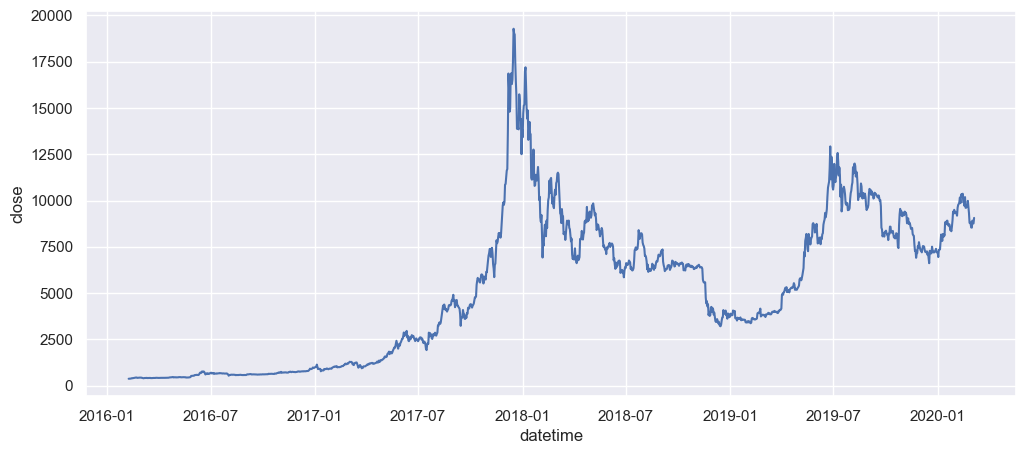

In [7]:
# Importar seaborn
import plotly.express as px
import numpy as np
import seaborn as sns
sns.set()

# Extraer
temp = df_bitcoin['close']

# Y graficarla
fig, ax = plt.subplots(figsize=(12,5))
sns.lineplot(temp, ax=ax);

In [8]:
# 0. Parámetros de la serie de tiempo
N = len(temp)      # Cantidad de muestras: [muestras]
muestras = 1           # Número de muestras/horas: [muestras/h]

# 1. Calcular la magnitud de la Transformada de Fourier derecha
tf = np.abs(np.fft.rfft(temp,N))

# 2. Calcular vector frecuencias (eje horizontal)
frecs = np.fft.rfftfreq(N, d=1./muestras)

# 3. Graficar
# Como tenemos 1 muestra por hora pero la serie dura varios años
# usaremos una escala logarítmica en el eje horizontal
fig = px.line(x=frecs, y=tf, log_x=True)
fig.update_layout(xaxis_title=f'Frecuencia')
fig.show()

In [9]:
frec1 = 0.004021
frec2 = 0.001340

print(f'La frecuencia {frec1} equivale a {1/frec1} dias')
print(f'La frecuencia {frec2} equivale a {1/frec2} dias')

La frecuencia 0.004021 equivale a 248.6943546381497 dias
La frecuencia 0.00134 equivale a 746.2686567164179 dias


In [10]:
resultado = (1/frec1)*(1/365.25)
print(f'La frecuencia {frec1} equivale a {resultado} años')

La frecuencia 0.004021 equivale a 0.680888034601368 años


# Creado la variable

In [11]:
# Codificar cada combinación AAAA-MM-DD HH:MM:SS a su representación
# en segundos
tiempo_s = df_coin.index.map(pd.Timestamp.timestamp)
tiempo_s

Index([1454976000.0, 1455062400.0, 1455148800.0, 1455235200.0, 1455321600.0,
       1455408000.0, 1455494400.0, 1455580800.0, 1455667200.0, 1455753600.0,
       ...
       1582588800.0, 1582675200.0, 1582761600.0, 1582848000.0, 1582934400.0,
       1583020800.0, 1583107200.0, 1583193600.0, 1583280000.0, 1583366400.0],
      dtype='float64', name='datetime', length=1499)

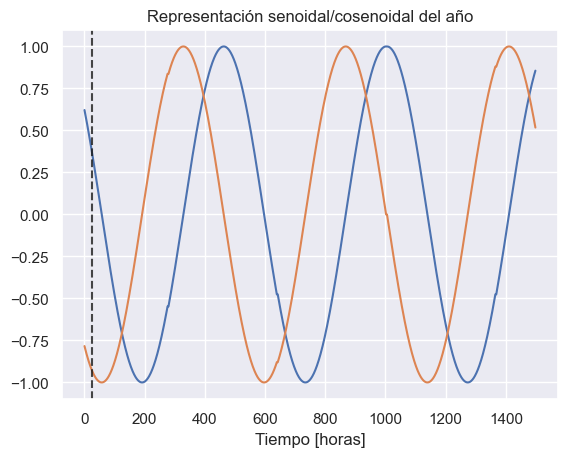

In [12]:
# Definir 1 día en segundos como 24 horas x 60 min x 60 s
dia = 24 * 60 * 60
year = (365.2425) * dia / resultado  # Valor de un año en segundos
# Representar el día senoidal y cosenoidalmente
# La frecuencia de la función será 1/día

# Representar la hora con senos y cosenos
year_sin = np.sin(tiempo_s * (2 * np.pi / year))
year_cos = np.cos(tiempo_s * (2 * np.pi / year))

# Graficar 2 días (48 horas)
fig, ax = plt.subplots()
plt.plot(np.array(year_sin))
plt.plot(np.array(year_cos))
plt.xlabel("Tiempo [horas]")
plt.title("Representación senoidal/cosenoidal del año")

# Dibujar línea vertical en 24 horas
ax.axvline(24, color="k", linestyle="--", alpha=0.8)

# Preparacion

In [13]:
df_coin.drop(columns=["name","id","serialId","symbol","slug"], inplace=True)

In [14]:
df_coin['year_sin'] = np.sin(tiempo_s * (2 * np.pi / year))
df_coin['year_cos'] = np.cos(tiempo_s * (2 * np.pi / year))
df_coin.head(3)

,open,high,low,close,volume,change_open,change_high,change_low,change_close,change_volume,...,bitcoin_low,bitcoin_close,bitcoin_volume,bitcoin_change_open,bitcoin_change_high,bitcoin_change_low,bitcoin_change_close,bitcoin_change_volume,year_sin,year_cos
datetime,,,,,,,,,,,,,,,,,,,,,
2016-02-09,0.000547,0.000579,0.000543,0.000568,151.877384,0.003131,0.061787,-0.003744,0.042246,11.091772,...,371.134725,374.419881,4.221380e+08,-0.009152,-0.011700,0.000076,0.003614,-0.070071,0.621485,-0.783426
2016-02-10,0.000542,0.000612,0.000516,0.000577,321.547248,-0.009640,0.056935,-0.049481,0.015598,1.117150,...,373.279047,380.798141,6.877410e+08,0.002347,0.019627,0.005778,0.017035,0.629185,0.612267,-0.790651
2016-02-11,0.000540,0.000561,0.000524,0.000561,244.764341,-0.002907,-0.082669,0.015362,-0.027431,-0.238792,...,373.702775,379.643758,4.435501e+08,0.014482,-0.001928,0.001135,-0.003031,-0.355062,0.602964,-0.797769


In [15]:
#Variables for training
# numerical variables
cols = df_coin.select_dtypes(include=[np.number]).columns
print(cols) 

Index(['open', 'high', 'low', 'close', 'volume', 'change_open', 'change_high',
       'change_low', 'change_close', 'change_volume', 'bitcoin_open',
       'bitcoin_high', 'bitcoin_low', 'bitcoin_close', 'bitcoin_volume',
       'bitcoin_change_open', 'bitcoin_change_high', 'bitcoin_change_low',
       'bitcoin_change_close', 'bitcoin_change_volume', 'year_sin',
       'year_cos'],
      dtype='object')


In [16]:
cols = [
    # "bitcoin_change_open",
    # "bitcoin_change_high",
    # "bitcoin_change_low",
    # "bitcoin_change_close",
    # "bitcoin_change_volume",
    "year_sin",
    "year_cos",
    # "change_open",
    # "change_high",
    # "change_low",
    # "change_close",
    # "change_volume",
    
    # "bitcoin_open",
    # "bitcoin_high",
    # "bitcoin_low",
    # "bitcoin_close",
    # "bitcoin_volume",
    "open",
    "high",
    "low",
    "volume",
    "close",
]

In [17]:
for i, col in enumerate(cols):
    print(i,col)

0 year_sin
1 year_cos
2 open
3 high
4 low
5 volume
6 close


In [18]:
# Reorganize columns
df_coin = df_coin[cols]
df_coin

,year_sin,year_cos,open,high,low,volume,close
datetime,,,,,,,
2016-02-09,0.621485,-0.783426,0.000547,0.000579,0.000543,151.877384,0.000568
2016-02-10,0.612267,-0.790651,0.000542,0.000612,0.000516,321.547248,0.000577
2016-02-11,0.602964,-0.797769,0.000540,0.000561,0.000524,244.764341,0.000561
2016-02-12,0.593578,-0.804776,0.000558,0.000880,0.000558,419.989658,0.000880
2016-02-13,0.584111,-0.811674,0.000840,0.001172,0.000707,2369.789614,0.001069
...,...,...,...,...,...,...,...
2020-03-01,0.830670,0.556765,0.026979,0.030872,0.026729,913297.851168,0.028325
2020-03-02,0.837134,0.546997,0.028118,0.030428,0.028118,104528.176121,0.030044
2020-03-03,0.843484,0.537154,0.030152,0.030436,0.029141,60722.782486,0.029415


Preparamos los datos para series de tiempo

In [19]:
# Función para generar las particiones preservando las características
# de la serie de tiempo
def train_val_test_split(dataframe, tr_size=0.8, vl_size=0.1):
    # Definir número de datos en cada subserie
    N = dataframe.shape[0]
    Ntrain = int(tr_size*N)  # Número de datos de entrenamiento
    Nval = int(vl_size*N)    # Número de datos de validación

    # Realizar partición
    train = dataframe[0:Ntrain]
    val = dataframe[Ntrain:Ntrain+Nval]
    test = dataframe[Ntrain+Nval:]

    return train, val, test

# Prueba de la función
tr, vl, ts = train_val_test_split(df_coin[cols])

print(f'Tamaño set de entrenamiento: {tr.shape}')
print(f'Tamaño set de validación: {vl.shape}')
print(f'Tamaño set de prueba: {ts.shape}')

Tamaño set de entrenamiento: (1199, 7)
Tamaño set de validación: (149, 7)
Tamaño set de prueba: (151, 7)


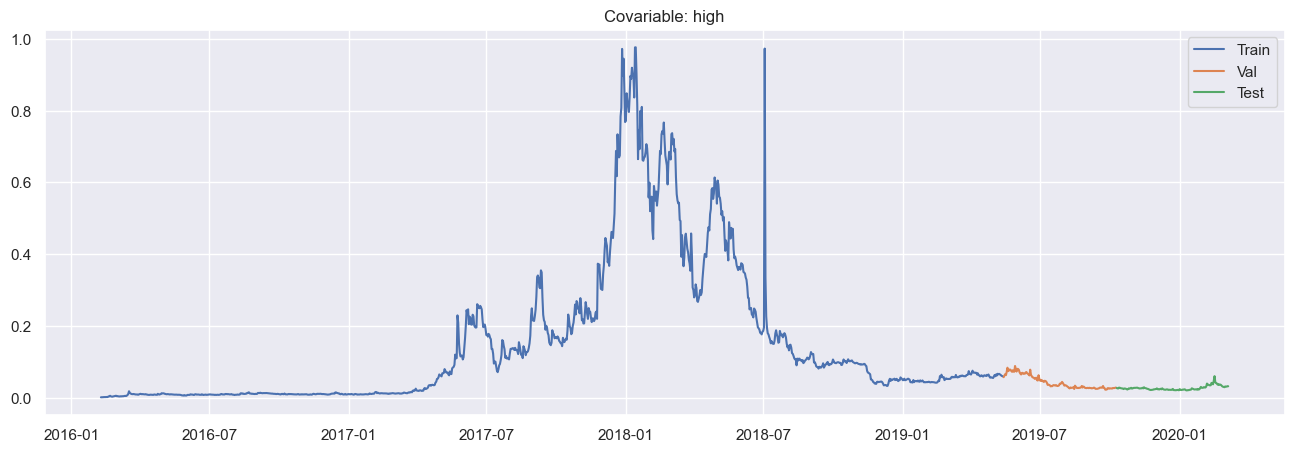

In [20]:
covar = 3 # Índice de la covariable (columna del dataset) a graficar
col = df_coin.columns[covar]

# Dibujar los sets de entrenamiento/validación/prueba para la covariable
fig, ax = plt.subplots(figsize = (16,5))
ax.plot(tr[col], label='Train')
ax.plot(vl[col], label='Val')
ax.plot(ts[col], label='Test')
ax.set_title(f'Covariable: {col}')
plt.legend();

In [21]:
def crear_dataset_supervisado(array, input_length, output_length):
    '''Permite crear un dataset con las entradas (X) y salidas (Y)
    requeridas por la Red LSTM.

    Parámetros:
    - array: arreglo numpy de tamaño N x features (N: cantidad de datos,
      f: cantidad de features)
    - input_length: instantes de tiempo consecutivos de la(s) serie(s) de tiempo
      usados para alimentar el modelo
    - output_length: instantes de tiempo a pronosticar (salida del modelo)
    '''

    # Inicialización
    X, Y = [], []    # Listados que contendrán los datos de entrada y salida del modelo
    shape = array.shape
    if len(shape)==1: # Si tenemos sólo una serie (univariado)
        fils, cols = array.shape[0], 1
        array = array.reshape(fils,cols)
    else: # Multivariado <-- <--- ¡esta parte de la función se ejecuta en este caso!
        fils, cols = array.shape

    # Generar los arreglos
    for i in range(fils-input_length-output_length):
        X.append(array[i:i+input_length,0:cols])
        Y.append(array[i+input_length:i+input_length+output_length,-1].reshape(output_length,1))

    # Convertir listas a arreglos de NumPy
    X = np.array(X)
    Y = np.array(Y)

    return X, Y

In [22]:
# Crear los datasets de entrenamiento, prueba y validación y verificar sus tamaños
INPUT_LENGTH = 24   # Hiperparámetro
OUTPUT_LENGTH = 1    # Modelo multi-step

x_tr, y_tr = crear_dataset_supervisado(tr.values, INPUT_LENGTH, OUTPUT_LENGTH)
x_vl, y_vl = crear_dataset_supervisado(vl.values, INPUT_LENGTH, OUTPUT_LENGTH)
x_ts, y_ts = crear_dataset_supervisado(ts.values, INPUT_LENGTH, OUTPUT_LENGTH)

# Imprimir información en pantalla
print('Tamaños entrada (BATCHES x INPUT_LENGTH x FEATURES) y de salida (BATCHES x OUTPUT_LENGTH x FEATURES)')
print(f'Set de entrenamiento - x_tr: {x_tr.shape}, y_tr: {y_tr.shape}')
print(f'Set de validación - x_vl: {x_vl.shape}, y_vl: {y_vl.shape}')
print(f'Set de prueba - x_ts: {x_ts.shape}, y_ts: {y_ts.shape}')

Tamaños entrada (BATCHES x INPUT_LENGTH x FEATURES) y de salida (BATCHES x OUTPUT_LENGTH x FEATURES)
Set de entrenamiento - x_tr: (1174, 24, 7), y_tr: (1174, 1, 1)
Set de validación - x_vl: (124, 24, 7), y_vl: (124, 1, 1)
Set de prueba - x_ts: (126, 24, 7), y_ts: (126, 1, 1)


Index(['open', 'high', 'low', 'close', 'volume', 'change_open', 'change_high',
       'change_low', 'change_close', 'change_volume', 'bitcoin_open',
       'bitcoin_high', 'bitcoin_low', 'bitcoin_close', 'bitcoin_volume',
       'bitcoin_change_open', 'bitcoin_change_high', 'bitcoin_change_low',
       'bitcoin_change_close', 'bitcoin_change_volume', 'year_sin',
       'year_cos'],
      dtype='object')

In [23]:
from sklearn.preprocessing import MinMaxScaler


def escalar_dataset(data_input, col_ref):
    """Escala el dataset en el rango de -1 a 1.

    Entradas:
    - data_input: diccionario con los dataset de entrada y salida del modelo
    (data_input = {'x_tr':x_tr, 'y_tr':y_tr, 'x_vl':x_vl, 'y_vl':y_vl,
                    'y_ts':y_ts})
    - col_ref: parámetro adicional para especificar la columna que contiene
      la variable a predecir


    Retorna:
    - data_scaled: diccionario con los datasets de entrada y salida escalados
      (tiene la misma estructura del diccionario de entrada)
    - scaler: el escalador usado (requerido para las predicciones)
    """

    # *** Implementación adicional: determinar el índice de la columna
    # que contiene la variable a predecir
    col_ref = df_coin.columns.get_loc(col_ref)
    # col_ref = 3

    # Número de instantes de tiempo de entrada y de covariables
    NSAMPLES = data_input["x_tr"].shape[1]
    NFEATS = data_input["x_tr"].shape[2]

    # Generar listado con "scalers" (1 por cada covariable de entrada)
    scalers = [MinMaxScaler(feature_range=(-1, 1)) for i in range(NFEATS)]

    # Arreglos que contendrán los datasets escalados
    x_tr_s = np.zeros(data_input["x_tr"].shape)
    x_vl_s = np.zeros(data_input["x_vl"].shape)
    x_ts_s = np.zeros(data_input["x_ts"].shape)
    y_tr_s = np.zeros(data_input["y_tr"].shape)
    y_vl_s = np.zeros(data_input["y_vl"].shape)
    y_ts_s = np.zeros(data_input["y_ts"].shape)

    # Escalamiento: se usarán los min/max del set de entrenamiento para
    # escalar la totalidad de los datasets

    # *************************************************
    # Escalamiento Xs: porción de código modificada para no escalar las
    # columnas con las variables temporales (columnas 11->14)
    # *************************************************
    FEAT_IDS = list(range(2,7)) # + list(range(10,14))  # Columnas 0->10 + 15-16
    for i in FEAT_IDS:
        x_tr_s[:, :, i] = scalers[i].fit_transform(x_tr[:, :, i])
        x_vl_s[:, :, i] = scalers[i].transform(x_vl[:, :, i])
        x_ts_s[:, :, i] = scalers[i].transform(x_ts[:, :, i])

    # *************************************************
    # Y dejar las columnas con variables temporales (13->16) intactas
    # *************************************************
    FEATS_TIME = list(range(2)) # Columnas 11-14
    x_tr_s[:, :, FEATS_TIME] = x_tr[:, :, FEATS_TIME]
    x_vl_s[:, :, FEATS_TIME] = x_vl[:, :, FEATS_TIME]
    x_ts_s[:, :, FEATS_TIME] = x_ts[:, :, FEATS_TIME]

    # Escalamiento Ys (teniendo en cuenta "col_ind")
    y_tr_s[:, :, 0] = scalers[col_ref].fit_transform(y_tr[:, :, 0])
    y_vl_s[:, :, 0] = scalers[col_ref].transform(y_vl[:, :, 0])
    y_ts_s[:, :, 0] = scalers[col_ref].transform(y_ts[:, :, 0])

    # Conformar diccionario de salida
    data_scaled = {
        "x_tr_s": x_tr_s,
        "y_tr_s": y_tr_s,
        "x_vl_s": x_vl_s,
        "y_vl_s": y_vl_s,
        "x_ts_s": x_ts_s,
        "y_ts_s": y_ts_s,
    }

    return data_scaled, scalers[col_ref]

In [24]:
# Escalamiento del dataset con la función anterior

# Crear diccionario de entrada
data_in = {
    'x_tr': x_tr, 'y_tr': y_tr,
    'x_vl': x_vl, 'y_vl': y_vl,
    'x_ts': x_ts, 'y_ts': y_ts,
}

# Y escalar (especificando la columna con la variable a predecir)
data_s, scaler = escalar_dataset(data_in, col_ref = 'close' )

# Extraer subsets escalados
x_tr_s, y_tr_s = data_s['x_tr_s'], data_s['y_tr_s']
x_vl_s, y_vl_s = data_s['x_vl_s'], data_s['y_vl_s']
x_ts_s, y_ts_s = data_s['x_ts_s'], data_s['y_ts_s']

## Modelamos

In [25]:
# Creación del modelo
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input, Dropout
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf


# Hiperparámetros
N_UNITS = 248
INPUT_SHAPE = (x_tr_s.shape[1], x_tr_s.shape[2])  # 24 (días) x K (features)
LEARNING_RATE = 1e-6
DROPOUT_RATE = 0.2

# Definición del modelo
modelo = Sequential()
modelo.add(Input(shape=INPUT_SHAPE))
modelo.add(LSTM(N_UNITS, return_sequences=False))
# modelo.add(Dropout(DROPOUT_RATE))
# modelo.add(LSTM(N_UNITS, return_sequences=False))
# modelo.add(Dropout(DROPOUT_RATE))

modelo.add(Dense(OUTPUT_LENGTH, activation="linear"))


# Compilación del modelo
optimizador = RMSprop(learning_rate=LEARNING_RATE)
modelo.compile(optimizer=optimizador, loss='mean_squared_error')

# Resumen del modelo
modelo.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 248)            │       253,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           249 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 254,201 (992.97 KB)

 Trainable params: 254,201 (992.97 KB)

 Non-trainable params: 0 (0.00 B)

In [46]:
EPOCHS = 50
BATCH_SIZE = 128  
historia = modelo.fit(
    x=x_tr_s,
    y=y_tr_s,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=(x_vl_s, y_vl_s),
    verbose=1,
)

Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0502 - val_loss: 0.1051
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.0471 - val_loss: 0.1014
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.0454 - val_loss: 0.0980
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0450 - val_loss: 0.0946
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.0427 - val_loss: 0.0913
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 0.0406 - val_loss: 0.0880
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.0390 - val_loss: 0.0848
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0375 - val_loss: 0.0815
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.0362 - val_loss: 0.0785
Epoch 10/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.0344 - val_loss: 0.0754
Epoch 11/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 0.0346 - val_loss: 0.0724
Epoch 12/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 0.0

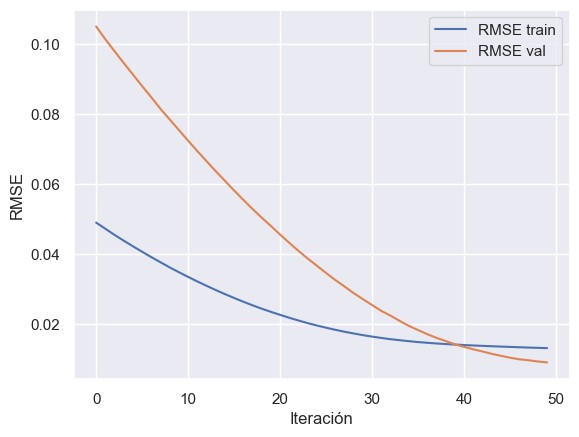

In [47]:
 # Graficar curvas de entrenamiento y validación
 # para verificar que no existe overfitting
plt.plot(historia.history['loss'],label='RMSE train')
plt.plot(historia.history['val_loss'],label='RMSE val')
plt.xlabel('Iteración')
plt.ylabel('RMSE')
plt.legend();

In [48]:
# Cálculo de rmses para train, val y test
rmse_tr = modelo.evaluate(x=x_tr_s, y=y_tr_s, verbose=0)
rmse_vl = modelo.evaluate(x=x_vl_s, y=y_vl_s, verbose=0)
rmse_ts = modelo.evaluate(x=x_ts_s, y=y_ts_s, verbose=0)

# Imprimir resultados en pantalla
print('Comparativo desempeños:')
print(f'  RMSE train:\t {rmse_tr:.3f}')
print(f'  RMSE val:\t {rmse_vl:.3f}')
print(f'  RMSE test:\t {rmse_ts:.3f}')

Comparativo desempeños:
  RMSE train:	 0.013
  RMSE val:	 0.009
  RMSE test:	 0.001


In [49]:
# Predicciones
def predecir(modelo, x, scaler):
    '''Realiza predicciones con el modelo entrenado.

    Parámetros:
    - modelo: modelo entrenado
    - x: dataset de entrada (escalado)
    - scaler: escalador usado para la variable a predecir

    Retorna:
    - pred: predicciones
    - real: valores reales
    '''

    # Realizar predicciones
    pred = modelo.predict(x)

    # Invertir el escalado
    pred_inv = scaler.inverse_transform(pred)
    return pred_inv

In [35]:
def generate_date_predictions(pred_tr,pred_vl,pred_ts,start):
    # Crear rango de fechas
    tr_rng = pd.date_range(start=start, periods=len(pred_tr), freq='D')
    vl_rng = pd.date_range(start=tr_rng[-1], periods=len(pred_vl), freq='D')
    ts_rng = pd.date_range(start=vl_rng[-1], periods=len(pred_ts), freq='D')
    
    return pd.DataFrame(pred_tr,index=tr_rng), pd.DataFrame(pred_vl,index=vl_rng), pd.DataFrame(pred_ts,index=ts_rng)

In [50]:
# Realizar predicciones
pred_tr = predecir(modelo, x_tr_s, scaler)
pred_vl = predecir(modelo, x_vl_s, scaler)
pred_ts = predecir(modelo, x_ts_s, scaler)
tr_plot,val_plot,ts_plot = generate_date_predictions(pred_tr,pred_vl,pred_ts,tr.index.min())

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step 


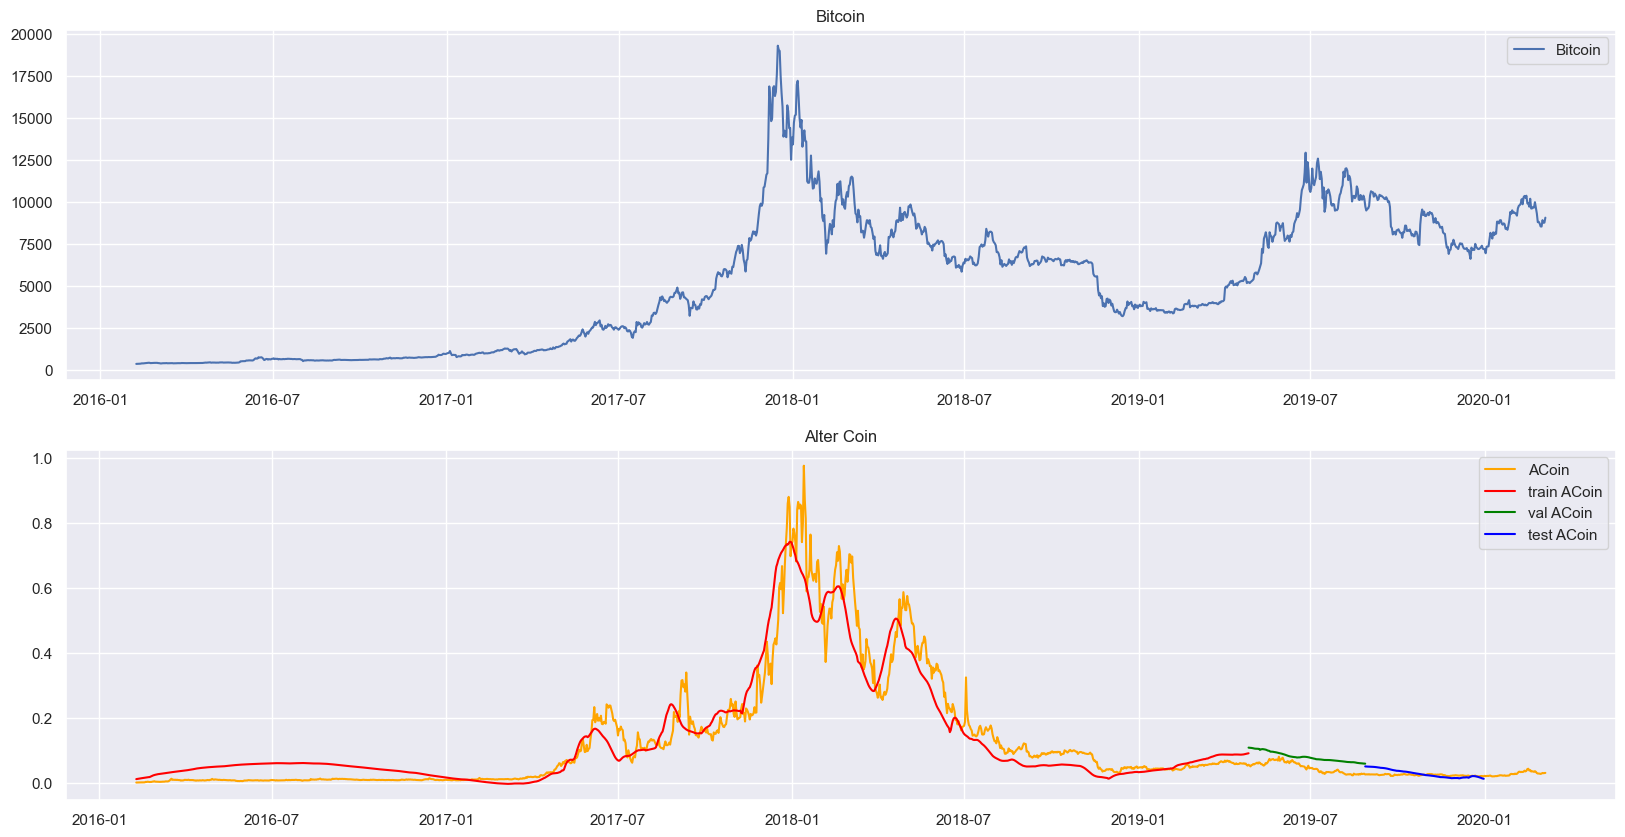

In [51]:
fig, axs = plt.subplots(2, 1, figsize=(20, 10))
# ax = plt.gca()
# ax.set_yscale('log')
axs[0].plot(df_bitcoin["close"], label=f"Bitcoin")
axs[0].set_title(f"Bitcoin")
axs[0].legend()

# axs[1].plot(df_coin["close"], label=f"ACoin", color="orange")
axs[1].plot(df_coin["close"], label=f"ACoin", color="orange")
axs[1].plot(tr_plot, label=f"train ACoin", color="red")
axs[1].plot(val_plot, label=f"val ACoin", color="green")
axs[1].plot(ts_plot, label=f"test ACoin", color="blue")
axs[1].set_title(f"Alter Coin")
axs[1].legend()